## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: VirProBERT

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [11]:
import seaborn

In [12]:
seaborn.__version__

'0.11.2'

In [15]:
import sys
import os
from pathlib import Path
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", ".."))
# sys.path
INPUT_PATH = "/data/sipek/zoonosis/output/raw/uniprotkb_cd_hit_embl_vertebrates_non_idv_hev/20250331/host_multi/mlm_tfenc_l6_h8_lr1e-4_uniprotkb_hepeviridae_cd-hit_hybrid_attention_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-5_output.csv"
MY_PATH = "/data/sipek/zoonosis"
os.chdir("/home/sipek/zoonosis")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import utils, evaluation_utils, visualization_utils

In [8]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"

def cm_heatmap_analysis(output_filepaths, classes, figure_output_filepath):
    results = []
    all_classes = classes
    for model, output_filepath in output_filepaths.items():
        df = pd.read_csv(output_filepath, index_col=0)
        print(f"Read output {model} = {df.shape}")
        
        cols = df.columns
        classes = list(set(cols) - set([itr_col, experiment_col, y_true_col]))
        itrs = df[itr_col].unique()
    
        # for itr in itrs:
        #     df_itr = df[df[itr_col] == itr]
        #     _, auprcs_df = evaluation_utils.compute_class_auprc(df_itr, y_pred_columns=classes, y_true_col=y_true_col)
        #     auprcs_df["model"] = model
        #     auprcs_df["itr"] = itr
        #     auprc_results.append(auprcs_df)
    # metadata = utils.compute_class_distribution(df_itr, y_true_col, format=False)
    # metadata_formatted = utils.compute_class_distribution(df_itr, y_true_col, format=True)
    # metadata_sorted = {}
    # for k, v in metadata.items():
    #     metadata_sorted[metadata_formatted[k]] = v
    # auprc_results_df = pd.concat(auprc_results, ignore_index=True)
    # auprc_results_df.replace({"class":metadata_formatted}, inplace=True)
    
    # FIGURE_CONFIG = {
    #     "figsize": (16, 10),
    #     "xtick.labelsize": 20,
    #     "ytick.labelsize": 20    
    # }

    # visualization_utils.pre_plot_config(FIGURE_CONFIG)
    # ax = sns.boxplot(data=auprc_results_df, x="class", y="auprc", hue="model", 
    #                  order=metadata_sorted, linewidth=2.5, fliersize=5,
    #                  palette="colorblind")
    # plt.draw()
    
    # ax.set_ylim(0, 1)
    # ax.set_ylabel("AUPRC", size=22)
    # ax.set_xlabel("", size=22, labelpad=2)
    # sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
    # plt.setp(ax.get_legend().get_texts(), fontsize=20)
    # visualization_utils.wrap_ticklabels(ax, axis="x")
    # visualization_utils.view(figure_output_filepath)
    # print(figure_output_filepath)
    # plt.show()
    return auprc_results_df

In [12]:
output_filepaths = {
    "VirProBERT": os.path.join(INPUT_PATH),
}
classes = ["Human","Swine", "Brown rat", "Wild boar", "Chevrier's field mouse" ]

Read output VirProBERT = (125, 7)
/data/sipek/zoonosis/output/visualization/auprc_plots/0325/host_multi_weights_classwise_aurpc_boxplot.pdf


<Figure size 640x480 with 0 Axes>

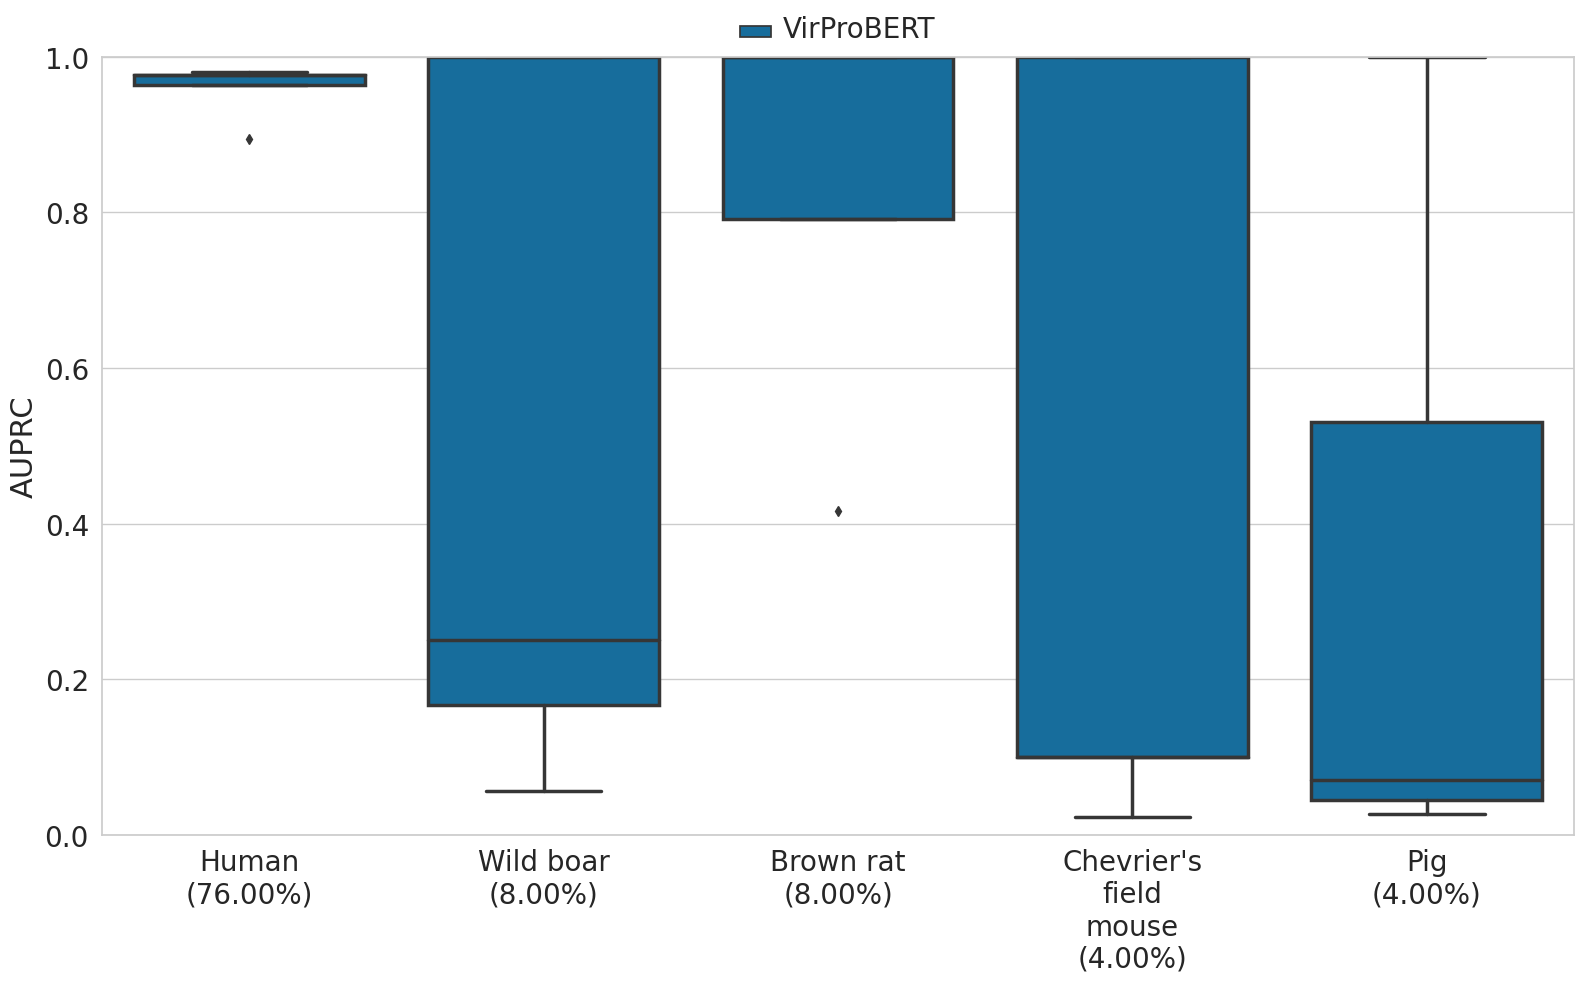

In [13]:
# figure_output_filepath = os.path.join(os.getcwd(), "..","..", "..", "..", "output/visualization/auprc_plots/0225/host_multi_all_models_classwise_aurpc_boxplot.pdf")
figure_output_filepath = os.path.join(MY_PATH, "output/visualization/cm_heatmap_plots/0325/host_multi_confusion-matrix_heatmap.pdf")
Path(os.path.dirname(figure_output_filepath)).mkdir(parents=True, exist_ok=True)
auprc_results_df = cm_heatmap_analysis(output_filepaths, classes, figure_output_filepath)

In [17]:
# auprc_results_macro = auprc_results_df[["model", "class", "auprc"]].groupby(["model", "class"]).mean("auprc")
# auprc_results_macro
# results_filepath = os.path.join(MY_PATH, "output/visualization/auprc_plots/033125/host_multi_weights_classwise_aurpc_macro.csv")
# auprc_results_macro.to_csv(results_filepath)